In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [14]:
files = {"JAN_3600":"../jan_3600.csv",
"JAN_7200":"../jan_7200.csv",
"FEB_3600":"../feb_3600.csv",
"FEB_7200":"../feb_7200.csv",
"MAR_3600":"../mar_3600.csv",
"MAR_7200":"../mar_7200.csv",
"APR_3600":"../apr_3600.csv",
"APR_7200":"../apr_7200.csv",
"MAY_3600":"../may_3600.csv",
"MAY_7200":"../may_7200.csv" }

datasets = dict()

In [15]:
for pretty_name,file_path in files.iteritems():
    datasets[pretty_name] = pd.read_csv(file_path)

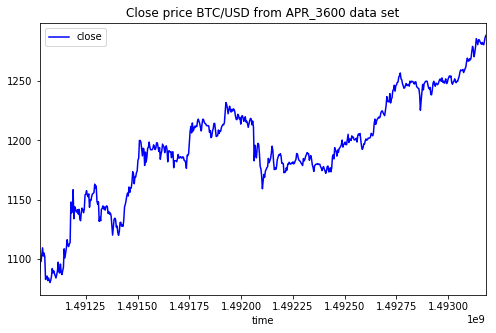

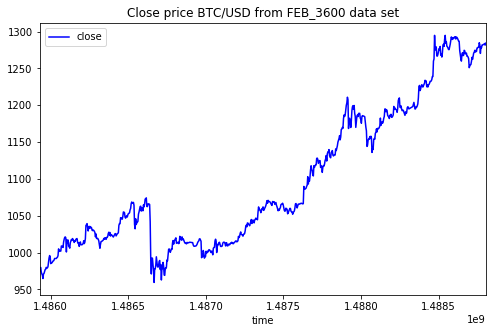

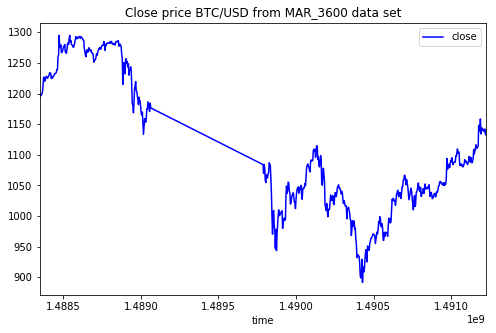

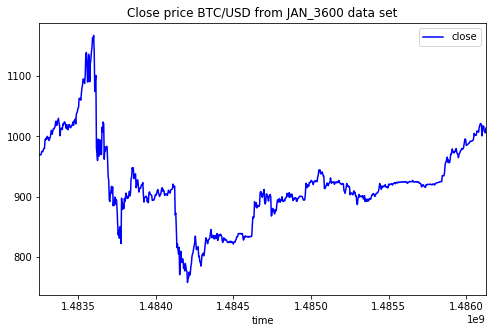

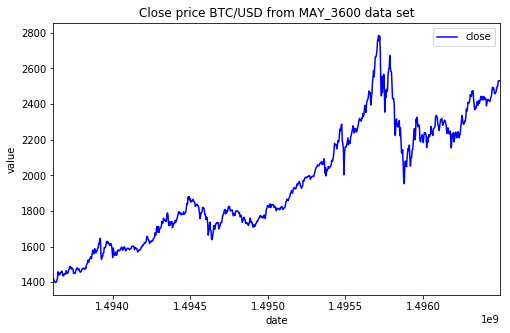

In [29]:
for pretty_name,dataset in datasets.iteritems():
    if "3600" in pretty_name:
        dataset.plot(style='b',
          figsize=(8,5),
          x='time', 
          y='close', 
          title='Close price BTC/USD from {} data set'.format(pretty_name),
         )
plt.xlabel('date')
plt.ylabel('value')


In [47]:
def daily_returns(prices):
    """Compute and return the daily return values."""
    daily_returns = prices.copy() # copy given Serie to match size 
    # compute daily returns for row 1 onwards
    daily_returns[1:] = (prices[1:] / prices[:-1].values)-1
    daily_returns.iloc[0] = 0 # set daily returns for row 0 to 0
    return daily_returns

In [99]:
def doStrategy(EMAs, data):

    infos = dict()
    infos["buy_idx"] = []
    infos["sell_idx"] = []

    long=False
    ema_labels = ['ema{}'.format(ema) for ema in EMAs]
    crossover_flags = [0 for _ in ema_labels[:-1]] # Ignore the last since it obviously crosses with itself anytime

    for i in range(len(data)):
        if long and sum(crossover_flags) == 0:
            long=False
            #print 'Sell signal generated at {} when price was {}'.format(int(data.iloc[i].time), data.iloc[i].close)
            infos["sell_idx"].append(int(data.iloc[i].time))
        elif not long and sum(crossover_flags) == len(crossover_flags):
            long=True
            #print 'Buy signal generated at {} when price was {}'.format(int(data.iloc[i].time), data.iloc[i].close)
            infos["buy_idx"].append(int(data.iloc[i].time))
       
        for j in range(len(ema_labels[:-1])): 
            if data.iloc[i][ema_labels[j]] - data.iloc[i][ema_labels[-1]] >= 0:
                crossover_flags[j] = 1
            else:
                crossover_flags[j] = 0
    return infos

In [134]:
start=5
stop=50
step=5
emas = range(start, stop, step)

returns_percentage_3600=[]
returns_percentage_7200=[]
portfolio_initial_value_in_eur=1000.00
print range(start, stop, step)
for pretty_name,dataset in datasets.iteritems():
    for ema in emas:
        dataset['ema{}'.format(ema)] = dataset['close'].ewm(span=ema).mean()
        dataset['returns'] = daily_returns(dataset['close'])
    print '===== {} ====='.format(pretty_name)
    infos = doStrategy(emas,dataset)
    
    
    if len(infos["sell_idx"]) < len(infos["buy_idx"]):
        infos["sell_idx"].append(int(dataset.iloc[-1].time))
    total_returns = 0.0
    for i in range(len (infos["buy_idx"])):
        total_returns += portfolio_initial_value_in_eur * np.sum(dataset[ (dataset.time >= infos["buy_idx"][i]) & \
                                  (dataset.time < infos["sell_idx"][i]) ].returns.values)
    if '3600' in pretty_name:
        returns_percentage_3600.append(100.0*(total_returns / portfolio_initial_value_in_eur))
    else:
        returns_percentage_7200.append(100.0*(total_returns / portfolio_initial_value_in_eur))
    print '===> Total returns: {} Eur ({}%)'.format(total_returns, 100.0*(total_returns / portfolio_initial_value_in_eur))
    
print 
print 
print '========== STATISTICS =========='
print 'AVG return percentage for 3600 sec granularity: {}'.format(np.mean(returns_percentage_3600))
print 'AVG return percentage for 7200 sec granularity: {}'.format(np.mean(returns_percentage_7200))
print 'STD return percentage for 3600 sec granularity: {}'.format(np.std(returns_percentage_3600))
print 'STD return percentage for 7200 sec granularity: {}'.format(np.std(returns_percentage_7200))
print 'MIN return percentage for 3600 sec granularity: {}'.format(np.min(returns_percentage_3600))
print 'MIN return percentage for 7200 sec granularity: {}'.format(np.min(returns_percentage_7200))
print 'MAX return percentage for 3600 sec granularity: {}'.format(np.max(returns_percentage_3600))
print 'MAX return percentage for 7200 sec granularity: {}'.format(np.max(returns_percentage_7200))

[5, 10, 15, 20, 25, 30, 35, 40, 45]
===== MAY_7200 =====
===> Total returns: 465.563012727 Eur (46.5563012727%)
===== MAR_7200 =====
===> Total returns: 102.899536849 Eur (10.2899536849%)
===== JAN_7200 =====
===> Total returns: 131.733631827 Eur (13.1733631827%)
===== APR_3600 =====
===> Total returns: 122.77637748 Eur (12.277637748%)
===== FEB_3600 =====
===> Total returns: 208.785201137 Eur (20.8785201137%)
===== MAR_3600 =====
===> Total returns: 76.0914367864 Eur (7.60914367864%)
===== JAN_3600 =====
===> Total returns: 170.281918269 Eur (17.0281918269%)
===== FEB_7200 =====
===> Total returns: 233.254308465 Eur (23.3254308465%)
===== MAY_3600 =====
===> Total returns: 401.433924209 Eur (40.1433924209%)
===== APR_7200 =====
===> Total returns: 323.234779802 Eur (32.3234779802%)


========== STATISTICS ==========
AVG return percentage for 3600 sec granularity: 19.5873771576
AVG return percentage for 7200 sec granularity: 25.1337053934
STD return percentage for 3600 sec granularity: